# **Práctica 2: Operaciones básicas con imágenes**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

# Lectura y visualización de imágenes

Una imagen se forma al convertir la luz captada por un sensor en un conjunto de valores de intensidad luminosa, con un valor asignado a cada celda. Cada unidad individual en la imagen se conoce como píxel (elemento de imagen).

Las imágenes adquiridas por un sensor se guardan en un archivo en el disco en una variedad de formatos posibles. Los formatos más frecuentes son PNG, que emplea compresión sin pérdida (lossless compression) y resulta óptimo para el procesamiento de imágenes, y JPG, un formato que utiliza compresión con pérdida (lossy compression) y suele ser preferido en la fotografía digital.

El formato de este tipo de ficheros es complejo y, por tanto, es necesario utilizar bibliotecas para su lectura. Entre las bibliotecas más utilizadas para este propósito, destacan OpenCV, Scikit-Image (SKImage) y Python Imaging Library (PIL). Estas herramientas proveen una amplia gama de funciones y utilidades que facilitan la gestión de estos formatos de archivo, permitiendo a los desarrolladores acceder y trabajar con imágenes de manera eficiente.



In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage

A continuación se muestran algunos ejemplos de cómo leer y visualizar imágenes

En primer lugar se descarga la imagen asumiendo que se dispone del programa `curl`.

In [2]:
!curl www.atc.uniovi.es/grado/3va/prac/pez.jpg --output pez.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 52 82974   52 43566    0     0   240k      0 --:--:-- --:--:-- --:--:--  245k
100 82974  100 82974    0     0   377k      0 --:--:-- --:--:-- --:--:--  384k


A continuación se utilizará OpenCV para leer la imagen.

[OpenCV](https://opencv.org/), que significa "Open Source Computer Vision Library" (Biblioteca de Visión por Computador de Código Abierto), es una biblioteca de software de código abierto ampliamente utilizada en el campo de la visión por computador y el procesamiento de imágenes. Fue desarrollada originalmente por Intel y ahora es gestionada por una comunidad de código abierto. OpenCV proporciona un conjunto de herramientas y algoritmos que permiten a los desarrolladores realizar una amplia variedad de tareas relacionadas con la visión por computador, como la detección de objetos, el seguimiento de objetos, el reconocimiento de patrones, la calibración de cámaras y la manipulación de imágenes.

Una de las funcionalidades de OpenCV es la lectura de imágenes en diversos formatos.

In [3]:
img = cv2.imread('pez.jpg')
print(f"Type: {type(img)}")
print(f"Shape: {img.shape}")
print(f"Dim: {img.ndim}")
num_rows, num_cols, num_colors = img.shape
print(f"Rows: {num_rows}")
print(f"Columns: {num_cols}")
print(f"Colors: {num_colors}")
print(f"DataType: {img.dtype}")

Type: <class 'numpy.ndarray'>
Shape: (684, 1024, 3)
Dim: 3
Rows: 684
Columns: 1024
Colors: 3
DataType: uint8


Como se puede observar, el resultado de la lectura de la imagen retorna un array de NumPy. El array tiene tres dimensiones, siendo la tercera dimensión utilizada para el color. Cada color se representa mediante una matriz.

Para visualizar la imagen se puede usar Matplotlib. Sin embargo es importante saber que, por defecto, OpenCV establece el orden de los canales de color como BGR (debido a razones históricas) y `matplotlib` espera recibir la imagen en formato RGB. Por tanto, para visualizar una imagen leída con OpenCV es necesario trasponer los canales.

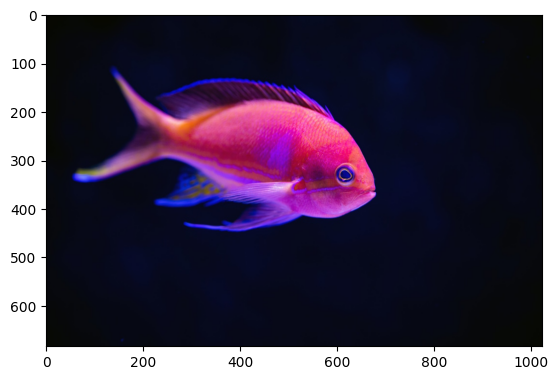

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

La conversión de formatos se puede realizar usando OpenCV o directamente con las matrices de NumPy.

In [5]:
img_rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb2 = img[:, :, ::-1]
np.array_equal(img_rgb1, img_rgb2)

True

Matplotlib permite visualizar imágenes en color o en escala de grises. Si se le pasa a la función una matriz, matplotlib asume que se trata de una imagen en escala de grises y configura la visualización para ajustarse al mínimo y máximo de la matriz.

(0, 255)
(0, 223)
(0, 255)


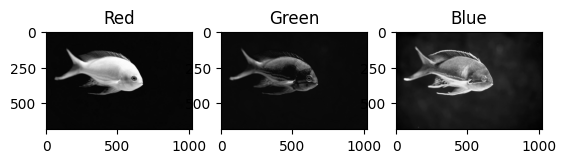

In [6]:
plt.subplot(1,3,1)
plt.imshow(img_rgb[:,:,0], cmap='gray')
plt.title('Red')
print(plt.gci().get_clim())

plt.subplot(1,3,2)
plt.imshow(img_rgb[:,:,1], cmap='gray')
plt.title('Green')
print(plt.gci().get_clim())

plt.subplot(1,3,3)
plt.imshow(img_rgb[:,:,2], cmap='gray')
plt.title('Blue')
print(plt.gci().get_clim())
plt.show()

Se puede iterar sobre los canales de color de una imagen RGB para visualizar cada canal por separado.

(0, 255)
(0, 223)
(0, 255)


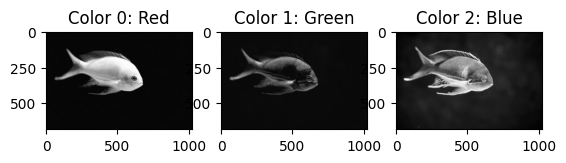

In [7]:
num_colors = img_rgb.shape[2]
colors = ['Red', 'Green', 'Blue']
for i in range(num_colors):
    plt.subplot(1, num_colors, i+1)
    channel = img_rgb[:,:,i]
    plt.imshow(channel, cmap='gray')
    plt.title(f'Color {i}: {colors[i]}')
    print(plt.gci().get_clim())
plt.show()

En muchos casos, se convierten las imágenes a formato de número real para realizar diversas operaciones.

Type: float32


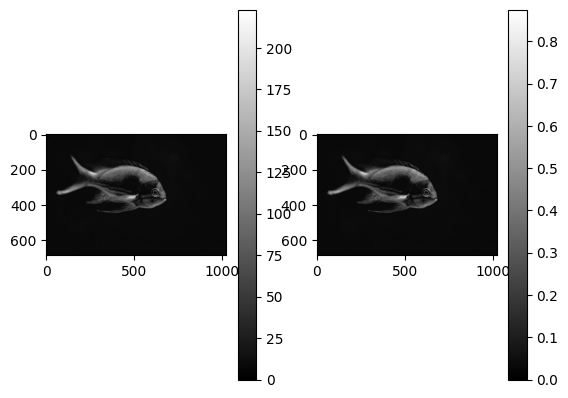

In [8]:
img_green = img_rgb[:,:,1]
img_green_float = img_green.astype(np.float32) / 255
print(f"Type: {img_green_float.dtype}")

plt.subplot(1,2,1)
plt.imshow(img_green, cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(img_green_float, cmap='gray')
plt.colorbar()
plt.show()


Visualization limits: (0, 223)


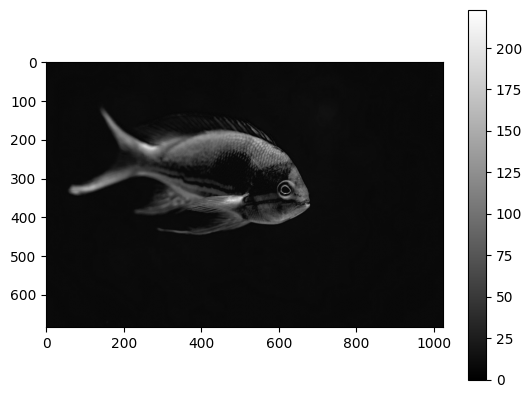

In [9]:
img_green = img_rgb[:,:,1]
plt.imshow(img_green, cmap='gray')
plt.colorbar()
print(f"Visualization limits: {plt.gci().get_clim()}")
plt.show()

Los límites se pueden modificar, tal y como se muestra a continuación.

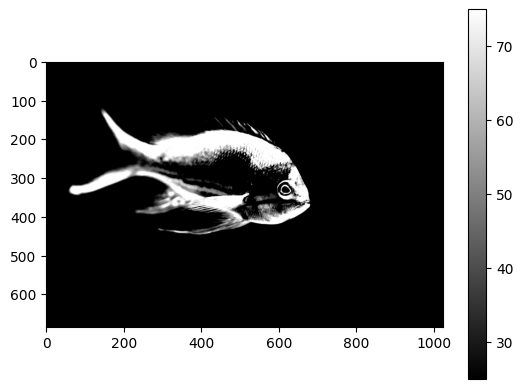

In [10]:
img_green = img_rgb[:,:,1]
plt.imshow(img_green, cmap='gray', vmin=25, vmax=75)
plt.colorbar()
plt.show()

En casos de ajuste de contraste, es bueno observar el histograma para determinar donde se encuentran los valores de intensidad de los píxeles.

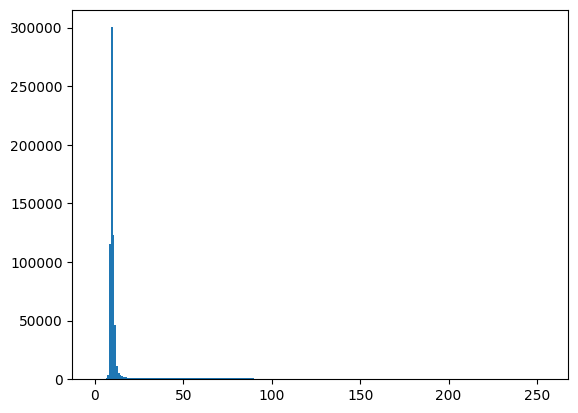

In [11]:
plt.hist(img_green.ravel(), bins=range(256))
plt.show()

Además, en el caso de imágenes en escala de grises también se puede configurar el mapa de color.

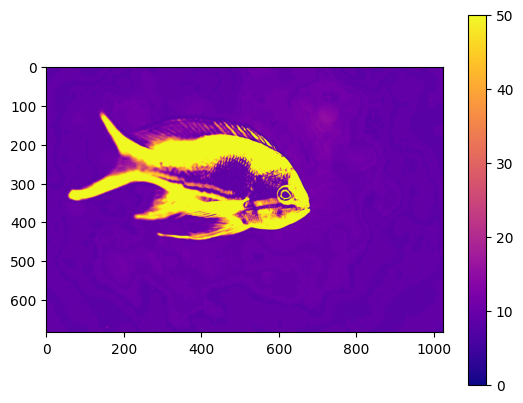

In [12]:
plt.imshow(img_green, clim=(0, 50), cmap="plasma")
plt.colorbar()
plt.show()

El parámetro `interpolation` en la función `imshow` de Matplotlib se utiliza para especificar el método que se debe utilizar para interpolar valores entre los píxeles de una imagen cuando se muestra en un gráfico. La interpolación es importante cuando se escala una imagen a un tamaño diferente al original, ya que determina cómo se calculan y muestran los valores de los píxeles intermedios.

Como se puede observar, puede tener un efecto importante en cómo se muestra una imagen.

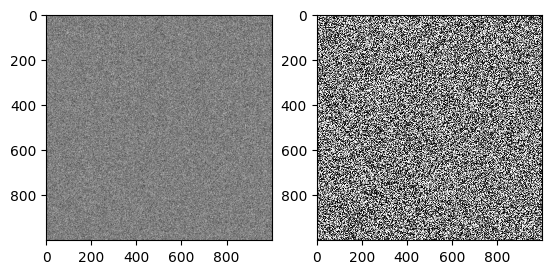

In [13]:
size = 1000
img_rng = np.random.randint(0, 256, (size, size), dtype=np.uint8)
plt.subplot(1,2,1)
plt.imshow(img_rng, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rng, cmap='gray', interpolation="none")
plt.show()

Otra de las bibliotecas importante que se utilizará a lo largo de la asignatura es [scikit-image](https://scikit-image.org/). Scikit-image, comúnmente conocida como "skimage", es una biblioteca de Python que forma parte del proyecto SciPy y se utiliza para el procesamiento de imágenes. Esta biblioteca ofrece una amplia gama de herramientas y funciones para realizar diversas tareas relacionadas con el procesamiento de imágenes, desde la carga y manipulación de imágenes hasta el análisis y la mejora de imágenes. 

Type: <class 'numpy.ndarray'>
Shape: (684, 1024, 3)
Dim: 3
Rows: 684
Columns: 1024
Colors: 3
DataType: uint8


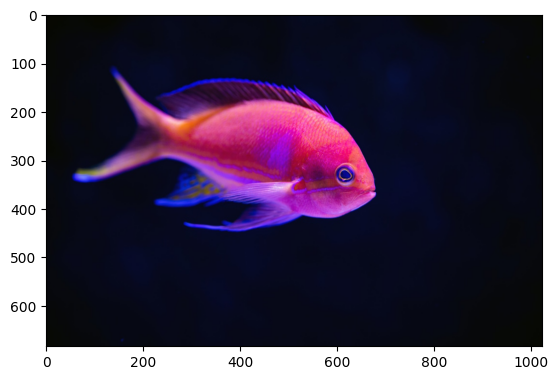

In [14]:
img = skimage.io.imread('pez.jpg')
print(f"Type: {type(img)}")
print(f"Shape: {img.shape}")
print(f"Dim: {img.ndim}")
num_rows, num_cols, num_colors = img.shape
print(f"Rows: {num_rows}")
print(f"Columns: {num_cols}")
print(f"Colors: {num_colors}")
print(f"DataType: {img.dtype}")
plt.imshow(img)
plt.show()

En este caso la imagen se carga en formato RGB, lista para la visualización.

# Indexado

## Imagen en escala de gris

En la indexación de NumPy, la primera dimensión (img.shape[0]) corresponde a las filas, mientras que la segunda (img.shape[1]) corresponde a las columnas, con el origen (img[0, 0]) en la esquina superior izquierda. Esto coincide con la notación de álgebra matricial/lineal, pero es contrario a las coordenadas cartesianas (x, y).



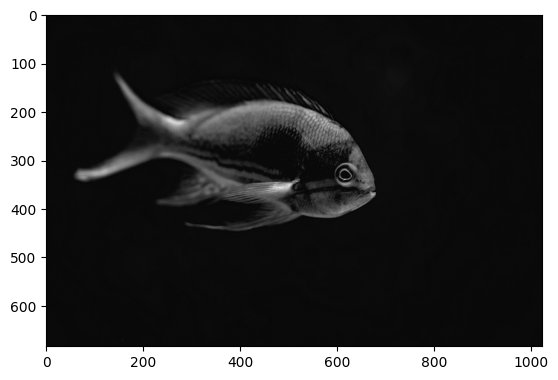

In [15]:
img_green = img[:,:,1].copy()
plt.imshow(img_green, cmap='gray')
plt.show()

8
255
128


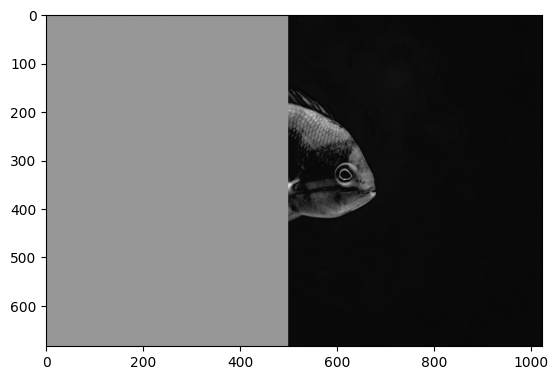

In [16]:
print(img_green[0, 0])

img_green[0, 0] = 255

print(img_green[0, 0])

img_green[:, 0:500] = 128

print(img_green[0, 0])

plt.imshow(img_green, cmap='gray')
plt.show()

El indexado también se puede realizar con una máscara de booleanos

255


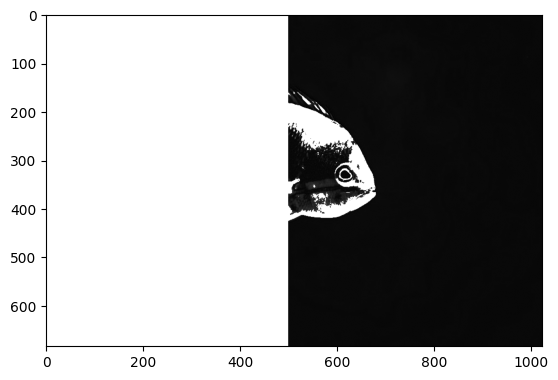

In [ ]:
mask = img_green > 50
img_green[mask] = 255 # valores mayores de 50 se ponen a 255
plt.imshow(img_green, cmap='gray')
print(img_green[0, 0])
plt.show()

## Imagen en color

Todo lo anterior es similar para imágenes en color




In [18]:
img[0, 0]

array([7, 8, 2], dtype=uint8)

In [19]:
img[50, 60] = 0

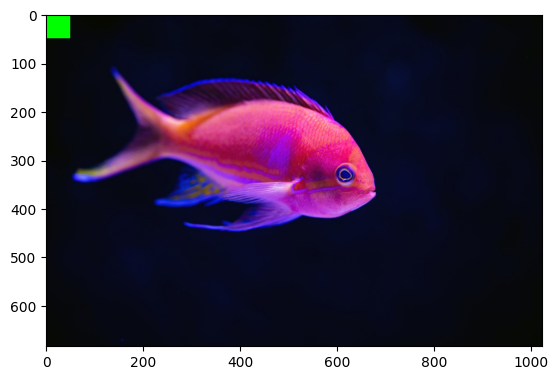

In [20]:
img[0:50, 0:50] = [0, 255, 0]
plt.imshow(img)

## Concatenación
A continuación se ilustra el uso de la función `np.concatenate` para combinar imágenes y manipular su dimensionalidad, partiendo de una imagen sintética simple.

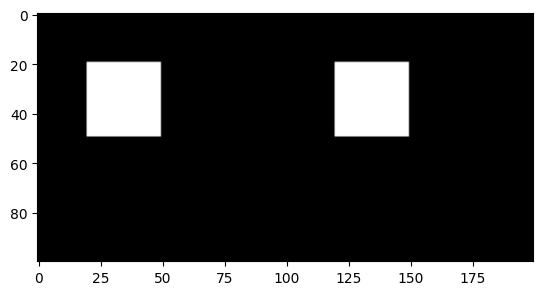

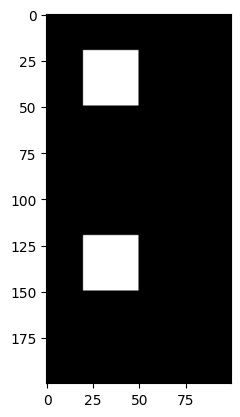

(100, 100, 3)


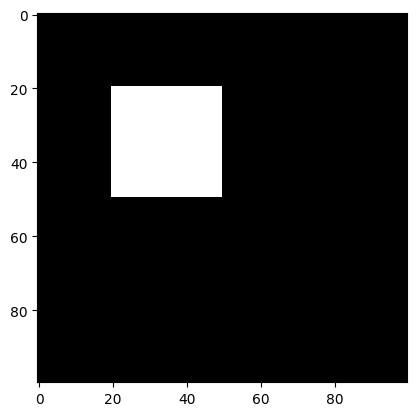

In [21]:
# Imagen en escala de grises
img = np.zeros((100, 100), dtype=np.uint8)

# Cuadrado blanco
img[20:50, 20:50] = 255

# Se concatena una copia de la imagen a la derecha
img_h = np.concatenate((img, img), axis=1)
plt.imshow(img_h, cmap='gray')
plt.show()

# Se concatena una copia de la imagen abajo
img_v = np.concatenate((img, img), axis=0)
plt.imshow(img_v, cmap='gray')
plt.show()

# Se apilan tres copias de la imagen para simular una imagen con tres canales
# axis=2 indica que la nueva dimensión se añade al final
img_c = np.stack([img, img, img], axis=2)
print(img_c.shape)
plt.imshow(img_c)
plt.show()

## Ejercicio

> Crea y visualiza una imagen similar a la siguiente.

![](http://www.atc.uniovi.es/grado/3va/prac/colors.png)

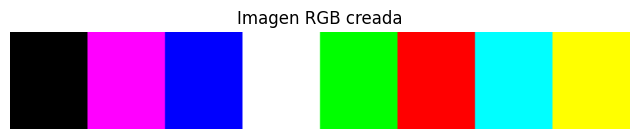

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) CREAR UNA IMAGEN RGB "similar" (desde cero)
# ============================================================

# En imágenes: una imagen en color suele ser un array de forma (alto, ancho, 3)
# donde el último eje representa los canales de color [R, G, B].
# Usamos dtype uint8 para trabajar como imagen clásica:
# cada canal toma valores enteros entre 0 y 255.
H, W = 50, 320 # height y width 
img = np.zeros((H, W, 3), dtype=np.uint8)

# ============================================================
# 2) DEFINIR LOS COLORES DE LAS FRANJAS (RGB)
# ============================================================

# Cada color se define como una tupla (R, G, B)
# El orden de los colores es el mismo que el de la imagen del enunciado:
# negro, magenta, azul, blanco, verde, rojo, cian, amarillo
colores = [
    (0, 0, 0),         # negro
    (255, 0, 255),     # magenta
    (0, 0, 255),       # azul
    (255, 255, 255),   # blanco
    (0, 255, 0),       # verde
    (255, 0, 0),       # rojo
    (0, 255, 255),     # cian
    (255, 255, 0)      # amarillo
]

# ============================================================
# 3) PINTAR LAS FRANJAS VERTICALES DE COLOR
# ============================================================

# Número total de franjas de color
n_franjas = len(colores)

# Cada franja tendrá el mismo ancho
# W // n_franjas asegura que todas tengan tamaño similar
ancho_franja = W // n_franjas

# Recorremos cada color y lo asignamos a su franja correspondiente
for i, color in enumerate(colores):
    
    # x0 y x1 definen los límites horizontales (columnas) de cada franja
    x0 = i * ancho_franja 
    x1 = (i + 1) * ancho_franja if i < n_franjas - 1 else W

    # img[:, x0:x1, :] -> todas las filas, columnas de la franja, los 3 canales
    # Asignamos directamente el color a toda la franja usando slicing
    img[:, x0:x1, :] = color

# ============================================================
# 4) VISUALIZAR LA IMAGEN RGB
# ============================================================

# matplotlib interpreta correctamente una imagen (H, W, 3) en formato RGB
# siempre que los valores estén en 0..255 y el tipo sea uint8
plt.figure(figsize=(8, 2))
plt.title("Imagen RGB creada")
plt.imshow(img)
plt.axis("off")
plt.show()


> Visualiza los canales de color de forma independiente
>
> Crea un línea horizontal en el centro de la imagen de color blanco.
>
> Convierte la imagen a escala de grises promediando los colores

shape: (50, 320, 3) dtype: uint8


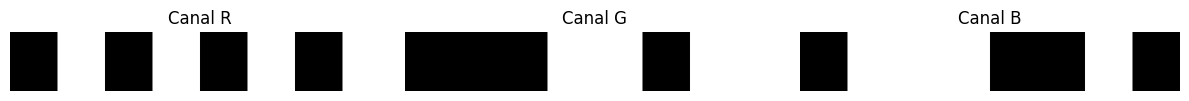

In [9]:
# ============================================================
# 3) VISUALIZAR LOS CANALES POR SEPARADO
# ============================================================

# Extraemos canales (recuerda: 0=R, 1=G, 2=B)
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
# : -> todas las filas y columnas

# (Opcional) Comprobación rápida típica de examen
print("shape:", img.shape, "dtype:", img.dtype)

# Mostrar cada canal como imagen en escala de grises (intensidad)
# Importante: usar cmap='gray' para ver el canal como "intensidad"
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.title("Canal R")
plt.imshow(R, cmap="gray", vmin=0, vmax=255) # muestra canal como escala de grises y añade rango
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Canal G")
plt.imshow(G, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Canal B")
plt.imshow(B, cmap="gray", vmin=0, vmax=255)
plt.axis("off")

plt.tight_layout()
plt.show()

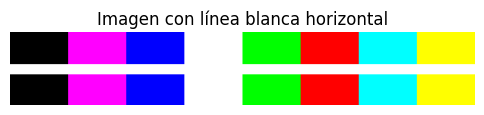

In [11]:
# ============================================================
# 4) CREAR UNA LÍNEA HORIZONTAL BLANCA EN EL CENTRO
# ============================================================

# El centro vertical está en la fila H//2
# Línea blanca = [255,255,255] en RGB
H = 50
fila_central = H // 2
# se calcula la fila del centro (entero //)

# Si quieres que la línea tenga grosor, usa un rango de filas
grosor = 3
img[fila_central - grosor : fila_central + grosor + 1, :, :] = [255, 255, 255]

plt.figure(figsize=(6, 4))
plt.title("Imagen con línea blanca horizontal")
plt.imshow(img)
plt.axis("off")
plt.show()

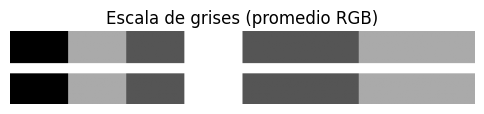

In [12]:
# ============================================================
# 5) CONVERTIR A ESCALA DE GRISES PROMEDIANDO LOS COLORES
# ============================================================

# Promediar colores = media de los 3 canales por píxel
# OJO: si haces mean sobre uint8, conviene convertir a float para que no haya problemas
gris_float = img.astype(np.float32).mean(axis=2)  # (H,W) valores 0..255
# astype para evitar problemas de cálculos con entero y axis=2 ya que es el eje de canales (RGB)

# Si quieres guardar como imagen uint8:
gris = gris_float.astype(np.uint8) # vuelve al formato imagen normal

plt.figure(figsize=(6, 4))
plt.title("Escala de grises (promedio RGB)")
plt.imshow(gris, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

# Tipos de datos

> Analiza el código que aparece a continuación y piensa en el resultado de la ejecución.

[255   0   0]


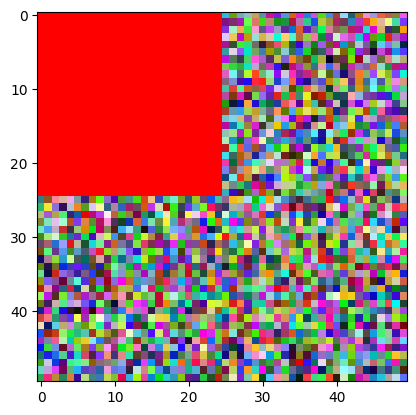

[0 1 1]


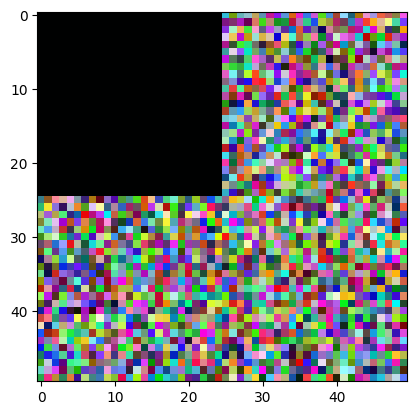

In [ ]:
# Se crea una imagen RGB aleatoria de tamaño 50x50
# Cada píxel tiene 3 canales (R, G, B) con valores entre 0 y 255
# El tipo uint8 implica que los valores se almacenan en 8 bits (0–255)
img = np.random.randint(0, 256, (50, 50, 3), dtype="uint8")

# Se modifica el cuadrante superior izquierdo de la imagen
# 0:img.shape[0]//2 -> mitad superior (filas)
# 0:img.shape[1]//2 -> mitad izquierda (columnas)
# Se asigna el color rojo puro en RGB = [255, 0, 0]
img[0:img.shape[0]//2, 0:img.shape[1]//2] = [255, 0, 0]

# Se imprime el valor del píxel en la esquina superior izquierda
# Este píxel pertenece al cuadrante modificado, por lo que será rojo
print(img[0, 0, :])  
# Resultado esperado: [255   0   0]

# Se visualiza la imagen:
# el cuadrante superior izquierdo aparece rojo
# el resto de la imagen mantiene colores aleatorios
plt.imshow(img)
plt.show()

# Se suma 1 a TODOS los píxeles y a TODOS los canales
# Como img es uint8, los valores que superan 255 "desbordan"
# Es decir: 255 + 1 = 256 -> se convierte en 0 (overflow)
img = img + 1

# Se vuelve a imprimir el píxel (0,0)
# Antes era [255, 0, 0]
# Tras sumar 1:
# 255 -> 0  (overflow)
# 0   -> 1
# 0   -> 1
print(img[0, 0, :])  
# Resultado esperado: [0   1   1]

# Se visualiza de nuevo la imagen
# El cuadrante rojo ahora aparece oscuro/casi negro
# debido al overflow del canal rojo
plt.imshow(img)
plt.show()


> ¿Eres capaz de explicar el resultado?
>
> Determina el tipo de datos utilizado para almacenar cada píxel y su rango de representación.

1) ¿Eres capaz de explicar el resultado?

Sí:

* `img = np.random.randint(0, 256, (50,50,3), dtype="uint8")` crea una imagen RGB **aleatoria** (ruido) de 50×50, con valores por canal entre **0 y 255**.

* `img[0:img.shape[0]//2, 0:img.shape[1]//2] = [255,0,0]` pinta el **cuadrante superior izquierdo** (filas 0–24 y columnas 0–24) de **rojo puro**.

* `print(img[0,0,:])` imprime el píxel (0,0), que está en ese cuadrante, por eso sale:
  **`[255 0 0]`**

* `img = img + 1` suma 1 a **todos** los valores de la imagen.
  Como `img` es `uint8`, cuando un valor llega a 256 **no cabe** y hace **overflow** (vuelve a 0):

  * 255 + 1 → 0

* Por eso el píxel (0,0) pasa de `[255,0,0]` a:

  * R: 255→0
  * G: 0→1
  * B: 0→1
    y se imprime:
    **`[0 1 1]`**

* Visualmente, el cuadrante rojo `[255,0,0]` se convierte en `[0,1,1]`, que se ve **casi negro**, por eso en la segunda imagen ese bloque aparece negro/oscuro.

---

2) Determina el tipo de datos usado para almacenar cada píxel y su rango

* **Tipo de datos:** `uint8` (entero sin signo de 8 bits)
* **Rango de representación:** de **0 a 255**
* **Comportamiento importante:** al superar 255 ocurre **overflow** (aritmética módulo 256), por ejemplo:

  * 255 + 1 = 0




Los tipos de datos y los rangos de representación siempre son cuestiones que se deben tener en cuenta. Para evitar la pérdida de precisión en operaciones intermedias es habitual convertir la imagen a otro tipo de dato (`img.astype(np.float64)`). Después de realizar las operaciones se vuele a convertir a tipo de dato original.

Ciertas bibliotecas solo admiten imágenes en formato `uint8`. Otras como skimage admiten también imágenes representadas como números reales, donde la intensidad se representa en el rango [0, 1].

# Ejercicio sobre máscaras

Una máscara no es más que una imagen binaria (cada píxel se representa como un valor booleano) donde se diferencia un elemento de interés (blanco) del fondo (negro)

Para evaluar el trabajo con imágenes se propone un ejercicio con máscaras:

> Descarga y lee una imagen en color.
>
> Crea una máscara con el mismo tamaño, canales y tipo de dato que la imagen. Inicialmente la máscara se inicializa con ceros.
>
> Escribe sobre la máscara tu nombre usando la función `cv2.putText` en blanco. El nombre debe estar centrado respecto a la imagen, para lo que se necesitará utilizar `cv2.getTextSize`.
>
> Modifica la imagen original, poniendo a color negro todos aquellos píxeles donde la máscara tuviera cero.

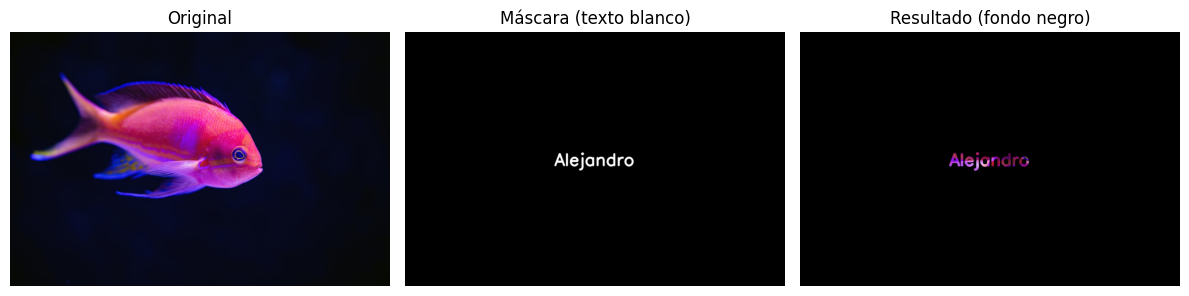

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# A) DESCARGAR/LEER UNA IMAGEN EN COLOR
# ============================================================
# En examen normalmente te darán una ruta o ya tendrás la imagen descargada.
# Aquí pongo una ruta de ejemplo: cámbiala por la tuya.
ruta = "pez.jpg"

img = cv2.imread(ruta, cv2.IMREAD_COLOR)  # BGR (OpenCV) por defecto

# ============================================================
# B) CREAR UNA MÁSCARA DEL MISMO TAMAÑO, CANALES Y TIPO
# ============================================================
# "Mismo tamaño, canales y tipo de dato" => usamos np.zeros_like(img)
# Esto crea una imagen (H,W,3) con dtype igual que img, toda a 0 (negra).
mask = np.zeros_like(img)

# ============================================================
# C) ESCRIBIR TU NOMBRE EN BLANCO CENTRADO (cv2.putText + cv2.getTextSize)
# ============================================================

texto = "Alejandro"  # <-- pon aquí tu nombre EXACTO como quieras que aparezca

# Fuente, escala y grosor (parámetros típicos de examen)
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 1.5
thickness = 3

# getTextSize te devuelve:
# (ancho_texto, alto_texto), baseline
(text_w, text_h), baseline = cv2.getTextSize(texto, font, scale, thickness)

# Para centrar:
# x = (ancho_imagen - ancho_texto) // 2
# y = (alto_imagen + alto_texto) // 2
# OJO: y en putText es la línea base del texto, por eso se usa +text_h
H, W = img.shape[:2]
x = (W - text_w) // 2
y = (H + text_h) // 2

# Escribimos en la máscara en BLANCO (255,255,255)
cv2.putText(mask, texto, (x, y), font, scale, (255, 255, 255), thickness, cv2.LINE_AA)

# ============================================================
# D) MODIFICAR LA IMAGEN: PONER A NEGRO DONDE LA MÁSCARA SEA 0
# ============================================================
# Queremos mantener SOLO el texto y poner negro el resto.
# La máscara ahora tiene:
# - texto: valores 255 en los 3 canales
# - fondo: 0

# Creamos máscara booleana: "donde hay texto"
# Como mask es 3 canales, tomamos uno (por ejemplo el canal 0) o convertimos a gris.
# cv2.cvtColor(imagen, codigo_conversion) -> convertir una imagen de un espacio de color a otro
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # convertimos a gris
texto_presente = mask_gray > 0  # máscara booleana True donde hay texto

# Copia de la imagen para no machacar la original
resultado = img.copy()

# Donde NO hay texto (mask = 0), ponemos negro
resultado[~texto_presente] = (0, 0, 0)

# ============================================================
# E) VISUALIZAR (en notebook / matplotlib)
# ============================================================
# OpenCV usa BGR y matplotlib RGB, así que convertimos para mostrar bien.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
res_rgb = cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Máscara (texto blanco)")
plt.imshow(mask_rgb)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Resultado (fondo negro)")
plt.imshow(res_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

# Formatos

Una imagen se puede guardar en diversos formatos. Los más comunes son PNG y JPG. 

> Descarga una imagen y realiza un programa para guardarla en PNG y JPG (`cv2.imwrite`). El JPG es un formato de que utiliza compresión con pérdida, por lo que será necesario indicar la calidad.
>
> Reduce progresivamente la calidad y analiza cómo afecta al tamaño del archivo y a la calidad de la imagen resultante. 
>
> Realiza un gráfico donde se muestre la relación entre el tamaño y la calidad.
>
> Realiza un gráfico donde se muestre la relación entre la calidad JPG y el índice de similitud con la imagen original (`skimage.metrics.structural_similarity`).


Una figura nunca se debe guardar usando los formatos anteriores, ya que perderá calidad. Siempre se debe utilizar algún formato vectorial, PDF o SVG.

> Exporta una figura (cualquier tipo de plot) en formato PDF y PNG. Visualiza el resultado y amplía la figura para observar las diferencias.

Tipo de datos de la imagen: uint8
Dimensiones de la imagen: (684, 1024, 3)

PNG guardado
Tamaño PNG (KB): 354.9453125


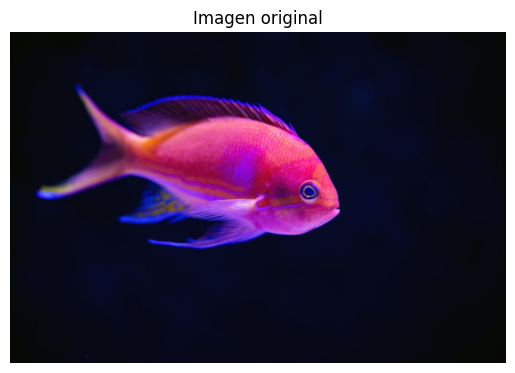


JPG calidad 100
  Tamaño (KB): 128.67
  SSIM: 0.9998
  Píxel (0,0) RGB: [7 8 2]


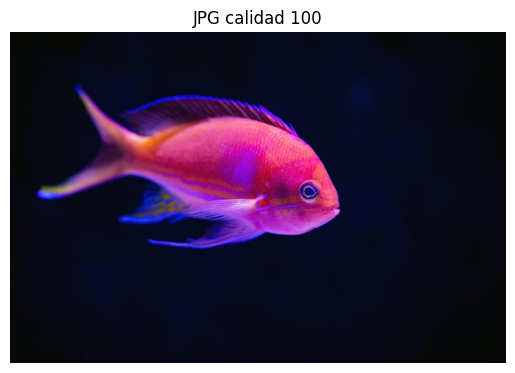


JPG calidad 80
  Tamaño (KB): 31.89
  SSIM: 0.9959
  Píxel (0,0) RGB: [7 8 2]


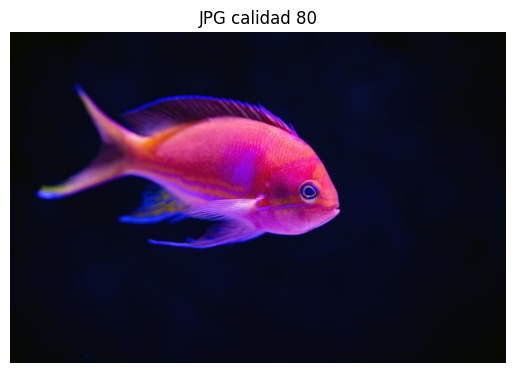


JPG calidad 60
  Tamaño (KB): 23.43
  SSIM: 0.9916
  Píxel (0,0) RGB: [8 9 3]


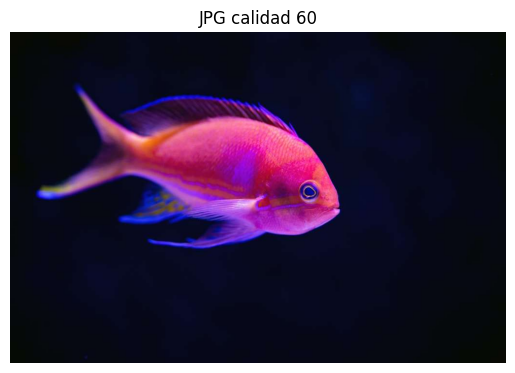


JPG calidad 40
  Tamaño (KB): 19.98
  SSIM: 0.9874
  Píxel (0,0) RGB: [8 9 3]


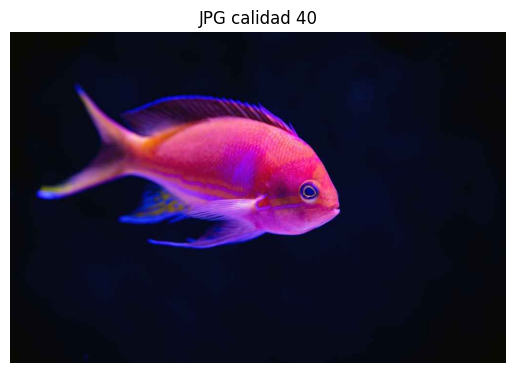


JPG calidad 20
  Tamaño (KB): 16.2
  SSIM: 0.9716
  Píxel (0,0) RGB: [ 8 10  0]


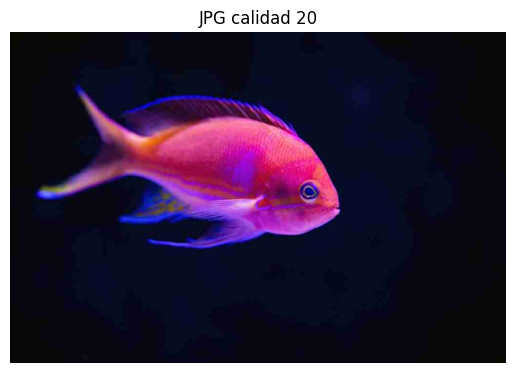

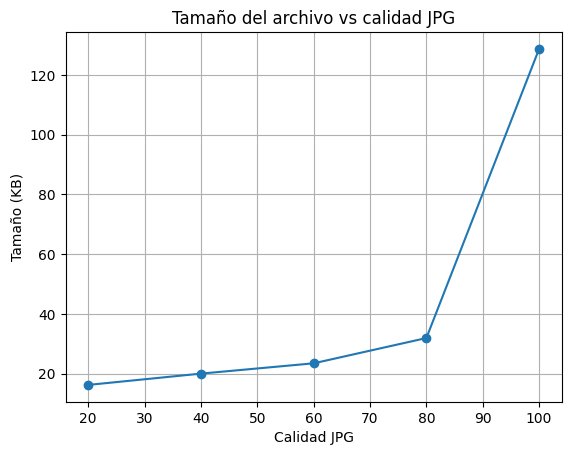

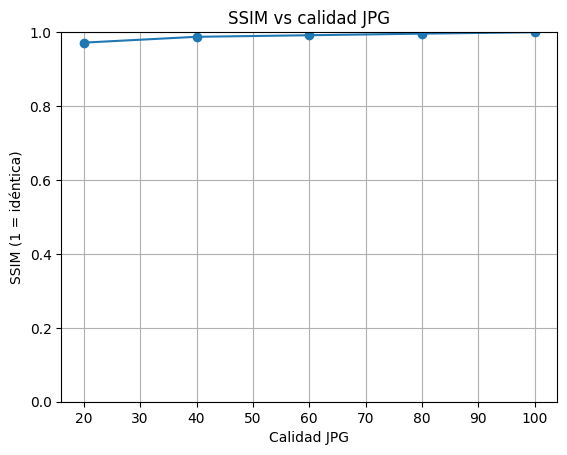


RESUMEN FINAL
Calidad 100 -> Tamaño  128.67 KB | SSIM 0.9998
Calidad  80 -> Tamaño   31.89 KB | SSIM 0.9959
Calidad  60 -> Tamaño   23.43 KB | SSIM 0.9916
Calidad  40 -> Tamaño   19.98 KB | SSIM 0.9874
Calidad  20 -> Tamaño   16.20 KB | SSIM 0.9716

✅ Terminado. Resultados en: C:\Users\user\Desktop\Vision\Vision-2026\PL2\salidas_formatos_simple


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.metrics import structural_similarity as ssim

# -----------------------------
# 1) Leer imagen
# -----------------------------
IMG_PATH = "pez.jpg"  # <-- cambia por tu imagen
img = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("No se pudo leer la imagen.")

print("Tipo de datos de la imagen:", img.dtype)
print("Dimensiones de la imagen:", img.shape)

# Convertimos a RGB SOLO para mostrar
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Imagen original en gris para SSIM
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Carpeta de salida
OUT = Path("salidas_formatos_simple")
OUT.mkdir(exist_ok=True)

# -----------------------------
# 2) Guardar PNG (sin pérdida)
# -----------------------------
png_path = OUT / "original.png"
cv2.imwrite(str(png_path), img)

print("\nPNG guardado")
print("Tamaño PNG (KB):", png_path.stat().st_size / 1024)

plt.figure()
plt.title("Imagen original")
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# -----------------------------
# 3) JPG a distintas calidades
# -----------------------------
qualities = [100, 80, 60, 40, 20]

sizes_kb = []
ssim_vals = []

for q in qualities:
    jpg_path = OUT / f"img_q{q}.jpg"

    # Guardar JPG
    cv2.imwrite(str(jpg_path), img, [cv2.IMWRITE_JPEG_QUALITY, q])

    # Tamaño del archivo
    size_kb = jpg_path.stat().st_size / 1024
    sizes_kb.append(size_kb)

    # Leer JPG
    jpg = cv2.imread(str(jpg_path), cv2.IMREAD_COLOR)
    jpg_rgb = cv2.cvtColor(jpg, cv2.COLOR_BGR2RGB)
    jpg_gray = cv2.cvtColor(jpg, cv2.COLOR_BGR2GRAY)

    # SSIM
    ssim_value = ssim(img_gray, jpg_gray, data_range=255)
    ssim_vals.append(ssim_value)

    # PRINTS IMPORTANTES (tipo examen)
    print(f"\nJPG calidad {q}")
    print("  Tamaño (KB):", round(size_kb, 2))
    print("  SSIM:", round(ssim_value, 4))
    print("  Píxel (0,0) RGB:", jpg_rgb[0, 0, :])

    # Mostrar imagen JPG
    plt.figure()
    plt.title(f"JPG calidad {q}")
    plt.imshow(jpg_rgb)
    plt.axis("off")
    plt.show()

# -----------------------------
# 4) Gráfico tamaño vs calidad
# -----------------------------
plt.figure()
plt.plot(qualities, sizes_kb, marker="o")
plt.title("Tamaño del archivo vs calidad JPG")
plt.xlabel("Calidad JPG")
plt.ylabel("Tamaño (KB)")
plt.grid(True)
plt.savefig(OUT / "tamano_vs_calidad.png", dpi=200)
plt.savefig(OUT / "tamano_vs_calidad.pdf")
plt.show()

# -----------------------------
# 5) Gráfico SSIM vs calidad
# -----------------------------
plt.figure()
plt.plot(qualities, ssim_vals, marker="o")
plt.title("SSIM vs calidad JPG")
plt.xlabel("Calidad JPG")
plt.ylabel("SSIM (1 = idéntica)")
plt.ylim(0, 1)
plt.grid(True)
plt.savefig(OUT / "ssim_vs_calidad.png", dpi=200)
plt.savefig(OUT / "ssim_vs_calidad.pdf")
plt.show()

# -----------------------------
# 6) Resumen final por consola
# -----------------------------
print("\nRESUMEN FINAL")
for q, size, s in zip(qualities, sizes_kb, ssim_vals):
    print(f"Calidad {q:>3} -> Tamaño {size:>7.2f} KB | SSIM {s:.4f}")
